# CountVectorizedTags with GradientBoostingClassifier & Hierarchical Classification

* Implementation: scripts/hierarchical_classifier.py

Hierarchical classifier used to adress neutral vs polarised classifcation.

## Import Libraries

In [1]:
# set sys path to access scripts
import sys
sys.path.append('../')

# general
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# model
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import scripts.hierarchical_classifier as hierarchical_classifier
from sklearn.ensemble import GradientBoostingClassifier

# custom scripts
import scripts.evaluator as evaluator
import scripts.config as config
from scripts.helpers import get_regex
from scripts.helpers import split_sentence
from scripts.helpers import list_to_comma_sep_string
from scripts.helpers import list_to_string
from scripts.helpers import pos_tagging

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## Import Data

In [2]:
df_phrase = pd.read_csv(config.FINANCIAL_PHRASE_BANK)
df_domain_dict = pd.read_csv(config.DOMAIN_DICTIONARY)

df_phrase['tags'] = df_phrase['tags'].replace(np.NaN,'')

## Create Train/Test Sets, Define Model, Train, Test

,experiment,result,accuarcy,precision,recall,fscore,misclass_indicies,predictions
0,cvt & gbc & hc,cross validation,0.776,0.764,0.707,0.727,[],[]
1,cvt & gbc & hc,test,0.766,0.760,0.693,0.716,"[8, 18, 19, 20, 22, 23, 33, 36, 40, 46, 60, 63...","[positive, neutral, neutral, neutral, neutral,..."


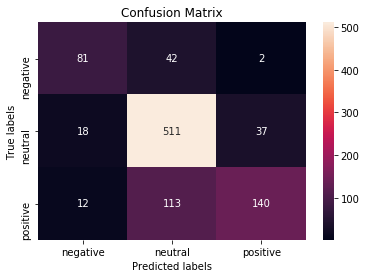

In [3]:
# get countvectors from data frame
column_names = [column_name for column_name in list(df_phrase.columns) if column_name[0:6]=='count_']

# test train split
X_train, X_test, y_train, y_test = train_test_split(df_phrase[column_names], 
                                                    df_phrase['sentiment'], 
                                                    test_size=config.TEST_SIZE, 
                                                    random_state=config.RANDOM_STATE)

# reset indicies -- required for heirachical classifier
# comparisson of models misclassified indicies in seperate notebook
# indicies required to be in line accross notebooks
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# model
model_1 = Pipeline([('model', GradientBoostingClassifier())])
model_2 = Pipeline([('model', GradientBoostingClassifier())])
hclass = hierarchical_classifier.heirarchical_classifier(model_1, model_2, y_test, ['positive','negative'], 'polarized', 'neutral')

# evaluator fits, predicts and returns metrics for model
_eval_svc = evaluator.evaluator('cvt & gbc & hc', hclass, X_train, y_train, X_test, y_test)
_eval_svc.plot_confusion()
_eval_svc.get_results()

In [4]:
_eval_svc.save_results('results/results.csv')